<a href="https://colab.research.google.com/github/aanchitnayak/estimators/blob/master/Parameter_Estimation_with_Batman.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Parameter Estimation with Batman

This notebook will help learners understand two simple parameter estimation methods:
1. Maximum Likelihood Estimate
2. Maximum Aposteriori Estimate 

The mathematics related to both these techniques is mentioned in vivid detail on my blog. Feel free to visit and comment. 

## Importing and Readying the Data for Dent's Tosses

In [0]:
import pandas as pd

data = pd.read_csv('cointoss_final.csv')
x = data['Result']

## Maximum Likelihood Estimate for Dent's Coin

For this, we shall use a simple derivative optimisation on the likelihood function and then find the probability of scarred heads for Harvey Dent's Coin. 

The optimisation formulation is, in summary, given by:

$$ \max_{\theta} l(\theta|C=c_i) = \sum_{i=1}^{N}c_i \log\theta+ \sum_{i=1}^{N}(1-c_i) \log(1-\theta)$$

Which results in

$$ \theta^{*} = \frac{n_1}{n_0 + n_1}$$

Where 

$$n_1 = \sum_{i=1}^{N}c_i$$
and,
$$n_2 = \sum_{i=1}^{N}1-c_i$$

Notice that $\theta^{*}$ represents the probability of the appearance of a scarred heads when two-face flips his coin. 

In [0]:
#Performing the MLE for the above data

n0 = 0
n1 = 0

for i in x:
    if i == 1:
        n1 = n1+1
    else:
        n0 = n0+1

th_h = n1 / (n0 + n1)

print('The Probability of a Scarred heads is given by {num}'.format(num = th_h))

The Probability of a Scarred heads is given by 0.5333333333333333


Notice how the probability is not exactly 0.5 but slightly more than it. This might be an indication that this coin is not very fair. It is skewed towards giving scarred heads against heads. The margin isn't very high, however. 

Since the dataset is small, we will use the next estimation technique to give a regulariser to the prior probability to $\Pr(\theta)$. This will give our answer a better polish. 

## Maximum Aposteriori Estimate

Now, instead of simply maximising the likelihood, we will do the same but with a regulariser. This comes in the form of a probability density given to the prior $\Pr(\theta)$. We will do this using a Beta function with shape parameters given by $\alpha = 4$ and $\beta = 1$. On doing this, we get the optimal $\theta^{*}$ as:

$$\theta^{*} = \frac{n_1 + \beta - 1}{n_0 + n_1 + \alpha + \beta -2 }$$

Also, the bayesian formulation for this prior estimate turns out to be

$$\Pr(\theta|\alpha, \beta, n_0, n_1) = Beta(\theta|\alpha+n_1,\beta+n_0) $$

The probability for the coin to show a scarred heads follows a beta distribution given as above. This gives us a finer result.

The Probability of a Scarred heads is given by 0.6111111111111112
The mean of the beta distribution is 0.6


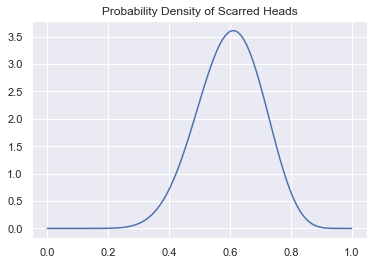

In [0]:
#MAP Estimator - Prob of Scarred Heads ->
b = 4
a = 1
th_H_MAP = (n1 + b -1)/(n0+n1+a+b-2)

from scipy.stats import beta
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns
sns.set()
  
x = np.linspace(0, 1.0, 100) 
  
# Varying positional arguments 
y1 = beta.pdf(x, b+n1, a+n0) 
plt.plot(x, y1) 
plt.title('Probability Density of Scarred Heads')
mean, var, skew, kurt = beta.stats(b+n1, a+n0, moments='mvsk')

print('The Probability of a Scarred heads is given by {num}'.format(num = th_H_MAP))
print('The mean of the beta distribution is {num}'.format(num = mean))

Notice how the new probability or $\Pr(\theta)$ is updated and how it is near to 0.61. This is a huge increment when compared to the MLE Estimator. Now we will do an interesting exercise. We will do the MLE and MAP Estimates simulatneously for a large dataset of about 10,000 tosses. We will then see which estimator was better.

## Verifying Results with a Limit

We shall now use the limiting condition given below and verify its truth. 

$$\lim_{n_1 + n_0 \rightarrow \infty} \theta_{MLE}^{*} \rightarrow \theta_{MAP}^{*}$$

This limit means that as more and more data is gathered, both estimates start to perform identically well. And we get the estimate more closer to the truth. Based on this, we can say which of the previously shown estimators was better with the given constants. 

### Importing and Readying the New Dataset 

In [0]:
data_new = pd.read_csv('cointoss_final_more_data.csv')
x_new = data_new['Result']

### Re-doing both Estimates Simultaneously 

The Probability of a Scarred heads given by MLE is 0.6086
The Probability of a Scarred heads is given by 0.6084174747575727
The mean of the beta distribution is 0.6083958020989505


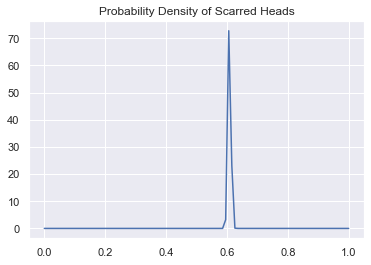

In [0]:
#Performing the MLE for the above data

n0 = 0
n1 = 0

for i in x_new:
    if i == 1:
        n1 = n1+1
    else:
        n0 = n0+1

th_h = n0 / (n0 + n1)

print('The Probability of a Scarred heads given by MLE is {num}'.format(num = th_h))

#Performing MAP
b = 4
a = 1
th_H_MAP = (n0 + a -1)/(n0+n1+a+b-2)

from scipy.stats import beta
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns
sns.set()
  
x = np.linspace(0, 1.0, 100) 
  
# Varying positional arguments 
y1 = beta.pdf(x,a+n0, b+n1) 
plt.plot(x, y1) 
plt.title('Probability Density of Scarred Heads')
mean, var, skew, kurt = beta.stats(a+n0, b+n1, moments='mvsk')

print('The Probability of a Scarred heads is given by {num}'.format(num = th_H_MAP))
print('The mean of the beta distribution is {num}'.format(num = mean))

# Conclusion

We saw how both estimators perform when the data is less. When we had only 15 data points, the MLE estimator was far off from the truth but with 10,000 data points, it was perfectly close to the truth. However, MAP with a well-informed prior (i.e., the Beta function whose shape parameters $\alpha$ and $\beta$ were well known) gave a very strong estimate with very little error. 

This brings us to the following conclusion - 

_When working with lesser data, MLE estimates may tend to be incorrect. As the data increases, the estimate keeps getting better and better. However, the MAP Estimates are very strong even with less data, but require a *very well informed* prior distribution_. 